# A practice in data analysis
The data has been taken from kaggle: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data?select=train.csv.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
df = []
df = features.merge(stores, on='Store')
df = df.merge(train, on=['Store', 'Date'])

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') 

In [5]:
df['year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.week

In [6]:
df = df.sort_values(by=['Date', 'Store', 'Dept'])

In [7]:
local_train = df[ (df['year'] < 2012) | ((df['week'] < 5) & (df['year'] == 2012)) ]

In [8]:
local_test = df[ (df['week'] >= 5) & (df['year'] == 2012) ]

In [9]:
local_test

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y,year,week
7455,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,1,23510.49,False,2012,5
7456,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,2,54322.24,False,2012,5
7457,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,3,12485.78,False,2012,5
7458,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,4,40274.83,False,2012,5
7459,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,5,28307.43,False,2012,5
7460,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,6,3981.09,False,2012,5
7461,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,7,16556.71,False,2012,5
7462,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,8,40069.47,False,2012,5
7463,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,9,19427.31,False,2012,5
7464,1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315,10,33524.28,False,2012,5


# 1.a.i) What is the store (Store ID) with the biggest total sales in September 2011; smallest total sales in January 2011? (two numbers divided by a comma, e.g. 1, 2)

In [10]:
df[ (df['year'] == 2011) & (df['Date'].dt.month == 9) ].groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)

Store
4     10208029.69
20    10005245.96
14     9499817.19
13     9432867.60
2      8568254.09
10     8393679.31
27     8242797.21
1      7379542.34
19     7173430.32
6      6960197.58
39     6917370.12
31     6759042.64
23     6705595.42
24     6429715.70
11     6244339.35
28     6168008.27
41     6095507.14
32     5627938.32
26     4944408.06
17     4824123.56
22     4707766.86
40     4658793.12
12     4602286.44
34     4558911.97
8      4226210.71
18     4038609.17
35     3930198.70
45     3597072.27
21     3346957.06
25     3261794.11
43     3003522.11
15     2868673.70
7      2789496.99
42     2761083.03
16     2649441.26
9      2589013.04
37     2582942.55
29     2398834.61
38     1984399.19
30     1902373.49
3      1862692.56
36     1683660.55
44     1516495.93
5      1498625.82
33     1247973.31
Name: Weekly_Sales, dtype: float64

In [11]:
df[ (df['year'] == 2011) & (df['Date'].dt.month == 1) ].groupby(['Store'])['Weekly_Sales'].sum().sort_values()

Store
33     979488.91
5     1101385.70
44    1133348.94
38    1441138.57
3     1475045.38
36    1566522.75
29    1738418.56
30    1781607.59
9     1866651.64
16    1955191.67
15    1957495.60
37    2108240.10
42    2239343.31
7     2243460.47
25    2299697.72
43    2390299.74
21    2593761.21
45    2595766.21
35    2630152.38
40    3205520.99
8     3287636.78
17    3333721.56
22    3335860.39
26    3377790.85
12    3397346.60
18    3451824.98
34    3527000.41
32    4159786.44
41    4320671.42
23    4333154.25
24    4580473.64
11    4661550.10
28    4708717.88
39    4819743.69
19    4902533.85
6     5204924.11
31    5261839.99
1     5480050.97
27    6038609.55
10    6818438.72
13    6830701.19
14    6920749.25
2     6949000.95
20    7270688.30
4     7428613.52
Name: Weekly_Sales, dtype: float64

# 1.a.ii) Did the store with the largest sales in March change from 2010 to 2011; from 2011 to 2012? (Yes/No)

In [12]:
print(df[ (df['year'] == 2010) & (df['Date'].dt.month == 3) ].groupby(['Store'])['Weekly_Sales'].sum().sort_values().head(1))
print(df[ (df['year'] == 2011) & (df['Date'].dt.month == 3) ].groupby(['Store'])['Weekly_Sales'].sum().sort_values().head(1))
print(df[ (df['year'] == 2012) & (df['Date'].dt.month == 3) ].groupby(['Store'])['Weekly_Sales'].sum().sort_values().head(1))

Store
44    1102711.79
Name: Weekly_Sales, dtype: float64
Store
33    1001675.79
Name: Weekly_Sales, dtype: float64
Store
33    1311764.19
Name: Weekly_Sales, dtype: float64


# 1.b.i) How many departments have substantially larger sales during holidays (>= 200%) compared to regular weeks (averaged over all train period, over all stores)? (single integer number, e.g. 1)
e.g. 1000$ on regular weeks and >2000$ on holidays’ weeks


In [13]:
del local_test['IsHoliday_y']
del local_train['IsHoliday_y']

In [14]:
train_holiday_false = pd.Series(local_train[local_train['IsHoliday_x'] == False].groupby(['Store','Dept'])['Weekly_Sales'].mean(), name='train_holiday_false')
train_holiday_true = pd.Series(local_train[local_train['IsHoliday_x'] == True].groupby(['Store','Dept'])['Weekly_Sales'].mean(), name='train_holiday_true')
train_holiday = pd.concat([train_holiday_false, train_holiday_true], axis=1)

#train_holiday_no_zeros = train_holiday[(train_holiday['train_holiday_false'] >= 0) & (train_holiday['train_holiday_true'] >= 0)].copy()
train_holiday['Is_sales_larger'] = (train_holiday['train_holiday_true'] >= train_holiday['train_holiday_false']) & ((train_holiday['train_holiday_false'] + abs(train_holiday['train_holiday_false'])) <= train_holiday['train_holiday_true'])
train_holiday['Is_sales_larger'].value_counts()

False    3173
True      133
Name: Is_sales_larger, dtype: int64

# How many departments have substantially smaller sales during holidays (<=50%) compared to regular weeks (averaged over all train period, over all stores)? 

In [15]:
#train_holiday_no_zeros = train_holiday[(train_holiday['train_holiday_false'] >= 0) & (train_holiday['train_holiday_true'] >= 0)].copy()
train_holiday['Is_sales_smaller'] = (train_holiday['train_holiday_true'] <= train_holiday['train_holiday_false']) & ((train_holiday['train_holiday_false']) >= (train_holiday['train_holiday_true'] + abs(train_holiday['train_holiday_true'])))
train_holiday['Is_sales_smaller'].value_counts()

False    3174
True      132
Name: Is_sales_smaller, dtype: int64

# Generate new attribute `Department_Type` (1,2,3): 1 for departments that have substantially smaller sales during holidays (<=50%) compared to regular weeks (averaged over all train period, over all stores); 3 for departments that have substantially larger sales during holidays (>= 200%) compared to regular weeks (averaged over all train period, over all stores); 2 for all other departments. How many departments of each type do you have? (3 integer numbers, divided by comma, e.g. 1, 2, 3)
If you want you may do that for every separate store.


In [16]:
train_holiday['Department_Type'] = 0

In [17]:
for ind, row in train_holiday.iterrows():
    if row['Is_sales_larger'] == True:
        train_holiday['Department_Type'][ind] = 3
    elif row['Is_sales_smaller'] == True:
        train_holiday['Department_Type'][ind] = 1
    else:
        train_holiday['Department_Type'][ind] = 2

C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
del train_holiday['train_holiday_false']
del train_holiday['train_holiday_true']
del train_holiday['Is_sales_larger']
del train_holiday['Is_sales_smaller']

In [19]:
local_train = local_train.merge(train_holiday, on=['Store', 'Dept'])

In [20]:
local_train

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,year,week,Department_Type
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2010,5,2
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,1,46039.49,2010,6,2
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,1,41595.55,2010,7,2
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,1,19403.54,2010,8,2
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,1,21827.90,2010,9,2
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315,1,21043.39,2010,10,2
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315,1,22136.64,2010,11,2
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315,1,26229.21,2010,12,2
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315,1,57258.43,2010,13,2
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315,1,42960.91,2010,14,2


# Compute correlation between total `Weekly_Sales` (in millions) over all training set and `Size`. (single number rounded to 3 decimal places, e.g. 0.001)

In [21]:
np.corrcoef(local_train['Weekly_Sales'], local_train['Size'])

array([[1.        , 0.24178021],
       [0.24178021, 1.        ]])

# Plot a scatter plot total (over all training set) `Weekly_Sales` (in millions) in a store vs  `Size` of the store.


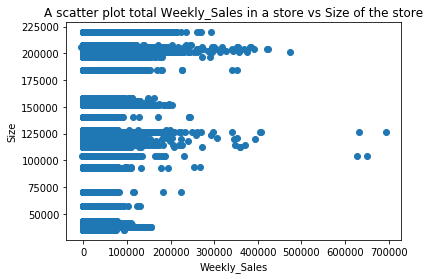

In [22]:
plt.scatter(local_train['Weekly_Sales'], local_train['Size'])
plt.title('A scatter plot total Weekly_Sales in a store vs Size of the store')
plt.xlabel('Weekly_Sales')
plt.ylabel('Size')
plt.show()

# Plot a boxplot of `Weekly_Sales` for different store types (3 boxes, one for every Type). For this plot filter out all `Weekly_Sales` bigger than 70000.


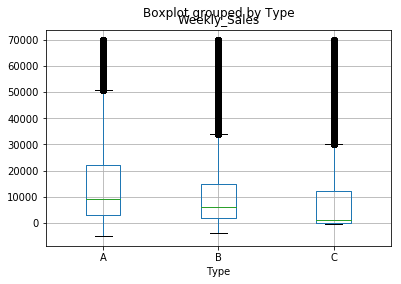

In [23]:
local_train[ (local_train['Weekly_Sales'] <= 70000) ].boxplot(column=['Weekly_Sales'], by='Type')

# Find Stores with Type == `B` which have total `Weekly_Sales`, (in millions) over all training set, more than 80% percentile of `Weekly_Sales` of stores with Type == `A`. (List of store IDs, e.g. 1, 2, 3)


In [24]:
per_80 = local_train[local_train['Type'] == 'A' ].groupby('Store').sum().Weekly_Sales.quantile(0.8)
local_train_all_store = local_train[local_train['Type'] == 'B' ].groupby('Store').sum()
local_train_all_store[ (local_train_all_store['Weekly_Sales'] >= per_80) ]

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Size,Dept,Weekly_Sales,year,week,Department_Type
Store,,,,,,,,,,,,,,,,
10,532636.2,25653.156,4444464.59,12854693.53,11235211.84,1464935.4,6584715.27,963597.103117,66055.648,581.0,953520944,332610,200092030.4,15153695,199439,15178


# Generate new attribute `Total_Sales_Store_Type`. 5 (from 1 to 5) groups generated using percentiles (0<=p<20, 20<=p<40, 40<=p<60, 60<=p<80, 80<=p<=100) of total `Weekly_Sales` (in millions) over all training set. How many stores of each type do you have? (5 numbers from 1 to 5 type). 


In [25]:
local_train_all_store = local_train.groupby('Store').sum()
local_train_all_store['Total_Sales_Store_Type'] = 0
per_20 = local_train_all_store.groupby('Store').sum().Weekly_Sales.quantile(0.2)
per_40 = local_train_all_store.groupby('Store').sum().Weekly_Sales.quantile(0.4)
per_60 = local_train_all_store.groupby('Store').sum().Weekly_Sales.quantile(0.6)
per_80 = local_train_all_store.groupby('Store').sum().Weekly_Sales.quantile(0.8)
for ind, row in local_train_all_store.iterrows():
    if row['Weekly_Sales'] < per_20:
        local_train_all_store['Total_Sales_Store_Type'][ind] = 1
    elif row['Weekly_Sales'] < per_40:
        local_train_all_store['Total_Sales_Store_Type'][ind] = 2
    elif row['Weekly_Sales'] < per_60:
        local_train_all_store['Total_Sales_Store_Type'][ind] = 3
    elif row['Weekly_Sales'] < per_80:
        local_train_all_store['Total_Sales_Store_Type'][ind] = 4
    else:
        local_train_all_store['Total_Sales_Store_Type'][ind] = 5

C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Anton\An

In [26]:
local_train = local_train.merge(local_train_all_store['Total_Sales_Store_Type'], on='Store')

# How many holidays’ weeks are in the train set; test set? (two integer numbers, divided by comma)

In [27]:
len(local_train[local_train['IsHoliday_x'] == True].groupby('Date').count())

8

In [28]:
len(local_test[local_test['IsHoliday_x'] == True].groupby('Date').count())

2

# Generate 5 separate attributes (nominal True-False or 1-0): `Is_SuperBowl`, `Is_BlackFriday`, `Is_Christmas`, `Other_holidays` and `Regular_weeks` (`Other_holidays` are all weeks which are not SuperBowl or BlackFriday or Christmas but have `Is_Holiday` = True; `Regular_weeks` are weeks which are not SuperBowl or BlackFriday or Christmas and `Is_Holiday` = False). How many `Other_holidays` weeks do you have in the whole training set?
Dates will slightly differ from year to year, use the following google search pattern: <us holiday_name year dates>, e.g. <us super bowl 2011 dates>. You could share these dates with your colleagues.


In [29]:
super_bowl = list(['2010-02-12',
                  '2011-02-11',
                   '2012-02-10'])
black_friday = list(['2010-11-26',
                     '2011-11-25',
                     '2012-11-23'])
christmas = list(['2010-12-31',
                  '2011-12-30',
                  '2012-12-28'])

#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [30]:
local_train['Is_SuperBowl'] = 0
local_train['Is_BlackFriday'] = 0
local_train['Is_Christmas'] = 0
local_train['Other_holidays'] = 0
local_train['Regular_weeks'] = 0

In [31]:
holidays = local_train.groupby('Date').min()[['Is_SuperBowl','Is_BlackFriday','Is_Christmas','Other_holidays','Regular_weeks','IsHoliday_x']]

In [32]:
for ind in range(len(holidays)):
    if str(holidays.index[ind].date()) in super_bowl:
        holidays['Is_SuperBowl'][ind] = 1
    elif str(holidays.index[ind].date()) in black_friday:
        holidays['Is_BlackFriday'][ind] = 1
    elif str(holidays.index[ind].date()) in christmas:
        holidays['Is_Christmas'][ind] = 1
    elif holidays['IsHoliday_x'][ind] == True:
        holidays['Other_holidays'][ind] = 1
    else:
        holidays['Regular_weeks'][ind] = 1

C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [33]:
holidays

,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks,IsHoliday_x
Date,,,,,,
2010-02-05,0,0,0,0,1,False
2010-02-12,1,0,0,0,0,True
2010-02-19,0,0,0,0,1,False
2010-02-26,0,0,0,0,1,False
2010-03-05,0,0,0,0,1,False
2010-03-12,0,0,0,0,1,False
2010-03-19,0,0,0,0,1,False
2010-03-26,0,0,0,0,1,False
2010-04-02,0,0,0,0,1,False


In [34]:
del holidays['IsHoliday_x']

In [38]:
del local_train['Is_SuperBowl']
del local_train['Is_BlackFriday']
del local_train['Is_Christmas']
del local_train['Other_holidays']
del local_train['Regular_weeks']

In [39]:
local_train = local_train.merge(holidays, on='Date')

In [40]:
local_train

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,year,week,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,24924.50,2010,5,2,5,0,0,0,0,1
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,50605.27,2010,5,2,5,0,0,0,0,1
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,13740.12,2010,5,2,5,0,0,0,0,1
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,39954.04,2010,5,2,5,0,0,0,0,1
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,32229.38,2010,5,2,5,0,0,0,0,1
5,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,5749.03,2010,5,2,5,0,0,0,0,1
6,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,21084.08,2010,5,2,5,0,0,0,0,1
7,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,40129.01,2010,5,2,5,0,0,0,0,1
8,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,16930.99,2010,5,2,5,0,0,0,0,1
9,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,30721.50,2010,5,2,5,0,0,0,0,1


In [41]:
holidays[holidays['Other_holidays'] == 1]

,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks
Date,,,,,
2010-09-10,0,0,0,1,0
2011-09-09,0,0,0,1,0


# Select 10 Stores with highest total Sales in 2011. Compute the percentage of Sales during Black Friday week compared to total Sales; during Super Bowl week; during Christmas week. (three integer numbers 0-100, e.g. 10,20,30)


In [42]:
top10salesStore = local_train.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=False)[:10].index

In [146]:
top10salesStore = local_train.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=False)[:10].index
top10_blackfriday = local_train[ (local_train['Is_BlackFriday'] == 1) & (local_train['year'] == 2011)].groupby('Store').sum().loc[top10salesStore].sum()['Weekly_Sales']
top10_alldays = local_train[local_train['year'] == 2011].groupby('Store').sum().loc[top10salesStore].sum()['Weekly_Sales']
print(round(top10_blackfriday / top10_alldays * 100),0)

3.0 0


In [147]:
round(local_train[(local_train['Is_SuperBowl'] == 1) & (local_train['year'] == 2011)].groupby('Store').sum().loc[top10salesStore].sum()['Weekly_Sales'] / local_train[local_train['year'] == 2011].groupby('Store').sum().loc[top10salesStore].sum()['Weekly_Sales'] * 100,0)

2.0

In [148]:
round(local_train[(local_train['Is_Christmas'] == 1) & (local_train['year'] == 2011)].groupby('Store').sum().loc[top10salesStore].sum()['Weekly_Sales'] / local_train[local_train['year'] == 2011].groupby('Store').sum().loc[top10salesStore].sum()['Weekly_Sales'] * 100,0)

2.0

# Select 10 Stores with lowest total Sales in 2011. Compute the percentage of Sales during Black Friday week compared to total Sales; during Super Bowl week; during Christmas week. (three integer numbers 0-100, e.g. 10,20,30)


In [46]:
low10salesStore = local_train.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=True)[:10].index

In [167]:
low10salesStore = local_train.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=True)[:10].index
low10_blackfriday = local_train[ (local_train['Is_BlackFriday'] == 1) & (local_train['year'] == 2011)].groupby('Store').sum().loc[low10salesStore].sum()['Weekly_Sales']
low10_alldays = local_train[local_train['year'] == 2011].groupby('Store').sum().loc[low10salesStore].sum()['Weekly_Sales']
print(round(low10_blackfriday / low10_alldays * 100),0)

2.0 0


In [168]:
round(local_train[(local_train['Is_SuperBowl'] == 1) & (local_train['year'] == 2011)].groupby('Store').sum().loc[low10salesStore].sum()['Weekly_Sales'] / local_train[local_train['year'] == 2011].groupby('Store').sum().loc[low10salesStore].sum()['Weekly_Sales'] * 100,0)

2.0

In [169]:
round(local_train[(local_train['Is_Christmas'] == 1) & (local_train['year'] == 2011)].groupby('Store').sum().loc[low10salesStore].sum()['Weekly_Sales'] / local_train[local_train['year'] == 2011].groupby('Store').sum().loc[low10salesStore].sum()['Weekly_Sales'] * 100,0)

2.0

# Plot a linear graph of temperature over time (averaged over all stores)

In [50]:
x = local_train.groupby(['Date']).mean()[['Temperature']].index
y = local_train.groupby(['Date']).mean()['Temperature']

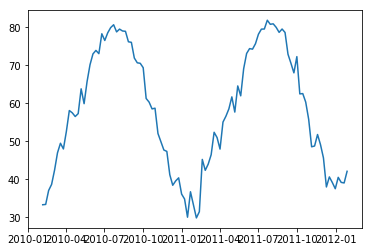

In [51]:
plt.plot(x, y)
plt.show()

# Plot a scatter plot of `Temperature` vs `Weekly_Sales` (every point corresponds to a single date, a single store).  Compute correlation between them.  (single number rounded to 3 decimal places, e.g. 0.001)


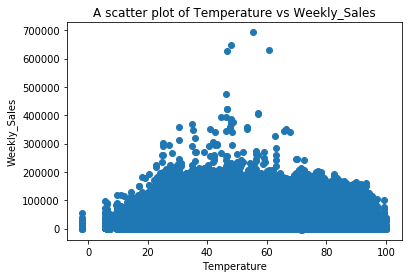

In [52]:
plt.scatter(local_train['Temperature'], local_train['Weekly_Sales'])
plt.title('A scatter plot of Temperature vs Weekly_Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

In [53]:
np.corrcoef(local_train['Weekly_Sales'], local_train['Temperature'])

array([[ 1.        , -0.00425691],
       [-0.00425691,  1.        ]])

# Find 2 stores with the biggest difference in temperature in July 2010. (two stores ID, e.g. 1, 2)

In [54]:
local_train[(local_train['year'] == 2010) & (local_train['Date'] >= '2010-07-01') & (local_train['Date'] < '2010-08-01')].groupby('Store').min()['Temperature'].sort_values()

Store
7     58.00
26    58.90
41    60.93
16    61.79
17    62.41
23    64.76
40    65.47
15    66.13
19    66.25
25    66.42
32    67.55
20    70.10
24    71.12
18    71.22
44    71.33
13    71.33
34    72.26
8     72.49
22    72.88
29    72.88
4     73.66
27    76.25
35    76.25
45    76.61
14    76.61
9     78.51
43    79.79
6     80.34
1     80.48
39    80.99
5     81.14
30    81.67
31    81.67
21    81.67
36    81.74
37    81.74
3     81.75
2     82.59
11    83.01
42    85.03
10    85.03
28    90.37
38    90.37
12    90.37
33    92.71
Name: Temperature, dtype: float64

7 и 33

# Plot a linear graph of temperature over time for these two stores, use different colors for different stores. 

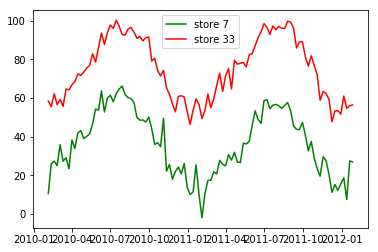

In [55]:
x = local_train.groupby(['Date']).mean()[['Temperature']].index
y_7 = local_train[local_train['Store'] == 7].groupby(['Date']).mean()['Temperature']
y_33 = local_train[local_train['Store'] == 33].groupby(['Date']).mean()['Temperature']

plt.plot(x, y_7, color = "g", label='store 7')
plt.plot(x, y_33, color = "r", label='store 33')
plt.legend()
plt.show()

# Plot a scatter plot of `Temperature` vs `Weekly_Sales`, use different colors for points corresponding to different stores. Compute correlation between temperature and sales separately for each of 2 stores.  (two numbers rounded to 3 decimal places, e.g. 0.001, 0.002)


In [56]:
x_7_sales = local_train[local_train['Store'] == 7].groupby(['Date']).sum()['Weekly_Sales']
y_7_sales = local_train[local_train['Store'] == 7].groupby(['Date']).min()['Temperature']

x_33_sales = local_train[local_train['Store'] == 33].groupby(['Date']).sum()['Weekly_Sales']
y_33_sales = local_train[local_train['Store'] == 33].groupby(['Date']).min()['Temperature']

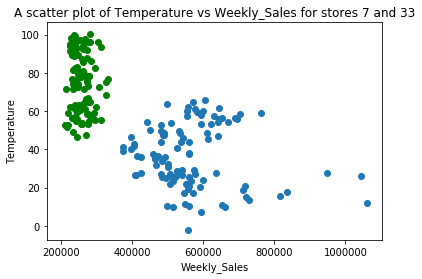

In [57]:
plt.scatter(x_7_sales, y_7_sales)
plt.scatter(x_33_sales, y_33_sales, color='g')
plt.title('A scatter plot of Temperature vs Weekly_Sales for stores 7 and 33')
plt.xlabel('Weekly_Sales')
plt.ylabel('Temperature')
plt.show()

In [58]:
np.corrcoef(x_33_sales, y_33_sales)

array([[ 1.       , -0.0313139],
       [-0.0313139,  1.       ]])

In [59]:
np.corrcoef(x_7_sales, y_7_sales)

array([[ 1.        , -0.11546987],
       [-0.11546987,  1.        ]])

# Generate new attribute `Average_Temperature_month`: average temperature over current month for this particular store. 
You may use any reasonable approach: e.g. for the current week average of the last 4 weeks, or average of all weeks from the same month one year ago.


In [60]:
local_train['month'] = local_train['Date'].dt.month

In [61]:
Average_Temperature = local_train.groupby(['Store', 'month']).mean()[['Temperature']]
Average_Temperature.rename(columns={'Temperature': 'Average_Temperature_month'}, inplace=True)
Average_Temperature

Average_Temperature_month
Store month                           
1     1                      47.192710
      2                      45.777418
      3                      56.977069
      4                      66.986634
      5                      73.705552
...                                ...
45    8                      75.461806
      9                      69.979918
      10                     59.033273
      11                     47.448484
      12                     37.970836

[540 rows x 1 columns]

In [62]:
local_train = local_train.merge(Average_Temperature, on=['Store','month'])

# Drop `Fuel_Price`, `MarkDown1`, `MarkDown2`, `MarkDown3`, `MarkDown4`, `MarkDown5`, `CPI`, `Unemployment`, `Temperature` as they only appears for the downloaded train table (they are not available for the “future”); Drop `Is_Holiday` and `Type` attribute; . 

In [63]:
del local_train['MarkDown1']
del local_train['MarkDown2']
del local_train['MarkDown3']
del local_train['MarkDown4']
del local_train['MarkDown5']
del local_train['CPI']
del local_train['Unemployment']
del local_train['Temperature']
del local_train['IsHoliday_x']
del local_train['Type']

In [64]:
del local_train['month']
local_train

,Store,Date,Fuel_Price,Size,Dept,Weekly_Sales,year,week,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks,Average_Temperature_month
0,1,2010-02-05,2.572,151315,1,24924.50,2010,5,2,5,0,0,0,0,1,45.777418
1,1,2010-02-05,2.572,151315,2,50605.27,2010,5,2,5,0,0,0,0,1,45.777418
2,1,2010-02-05,2.572,151315,3,13740.12,2010,5,2,5,0,0,0,0,1,45.777418
3,1,2010-02-05,2.572,151315,4,39954.04,2010,5,2,5,0,0,0,0,1,45.777418
4,1,2010-02-05,2.572,151315,5,32229.38,2010,5,2,5,0,0,0,0,1,45.777418
5,1,2010-02-05,2.572,151315,6,5749.03,2010,5,2,5,0,0,0,0,1,45.777418
6,1,2010-02-05,2.572,151315,7,21084.08,2010,5,2,5,0,0,0,0,1,45.777418
7,1,2010-02-05,2.572,151315,8,40129.01,2010,5,2,5,0,0,0,0,1,45.777418
8,1,2010-02-05,2.572,151315,9,16930.99,2010,5,2,5,0,0,0,0,1,45.777418
9,1,2010-02-05,2.572,151315,10,30721.50,2010,5,2,5,0,0,0,0,1,45.777418


# Generate `sample_weights` attribute and set the roles for `sample_weights` (weight) and `Weekly_Sales` (label);
You might use so-called “lag” features: e.g. to predict Sales on January, 2014 use `Unemployment` for the last available period (July 2013). But you should do it with extreme caution.


In [65]:
local_train['sample_weights'] = 0#local_train['Regular_weeks'] * 10
#local_train[local_train['Regular_weeks'] == 0 ].loc['sample_weights'] = 10

C:\Users\Anton\Anaconda3\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
#local_train[local_train['Regular_weeks'] == 0 ].loc['sample_weights'] = 10
for ind in range(len(local_train)):
    if local_train['Regular_weeks'][ind] == 0:
        local_train['sample_weights'][ind] = 20

C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [90]:
local_train

,Store,Date,Size,Dept,Weekly_Sales,year,week,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks,Average_Temperature_month,sample_weights
0,1,2010-02-05,151315,1,24924.50,2010,5,2,5,0,0,0,0,1,45.777418,0
1,1,2010-02-05,151315,2,50605.27,2010,5,2,5,0,0,0,0,1,45.777418,0
2,1,2010-02-05,151315,3,13740.12,2010,5,2,5,0,0,0,0,1,45.777418,0
3,1,2010-02-05,151315,4,39954.04,2010,5,2,5,0,0,0,0,1,45.777418,0
4,1,2010-02-05,151315,5,32229.38,2010,5,2,5,0,0,0,0,1,45.777418,0
5,1,2010-02-05,151315,6,5749.03,2010,5,2,5,0,0,0,0,1,45.777418,0
6,1,2010-02-05,151315,7,21084.08,2010,5,2,5,0,0,0,0,1,45.777418,0
7,1,2010-02-05,151315,8,40129.01,2010,5,2,5,0,0,0,0,1,45.777418,0
8,1,2010-02-05,151315,9,16930.99,2010,5,2,5,0,0,0,0,1,45.777418,0
9,1,2010-02-05,151315,10,30721.50,2010,5,2,5,0,0,0,0,1,45.777418,0


In [89]:
del local_train['Fuel_Price']

# Building a regression model
This is actually the simplest part


In [69]:
del local_test['MarkDown1']
del local_test['MarkDown2']
del local_test['MarkDown3']
del local_test['MarkDown4']
del local_test['MarkDown5']
del local_test['CPI']
del local_test['Unemployment']
del local_test['Temperature']
del local_test['Type']

In [70]:
del local_test['Fuel_Price']

In [83]:
local_test['month'] = local_test['Date'].dt.month

In [84]:
local_test

,Store,Date,IsHoliday_x,Size,Dept,Weekly_Sales,year,week,Department_Type,Total_Sales_Store_Type,month
0,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
1,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
2,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
3,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
4,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
5,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
6,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
7,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
8,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2
9,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2


In [72]:
local_test = local_test.merge(local_train[['Store','Dept','Department_Type']], on=['Store','Dept'])

In [73]:
store_type = local_train[['Store','Total_Sales_Store_Type']]

In [74]:
local_test = local_test.merge(store_type.drop_duplicates(), on='Store')

In [78]:
store_temperature = local_train[['Store','Date','Average_Temperature_month']].drop_duplicates()

In [80]:
store_temperature['Date'] = store_temperature['Date'].dt.month

In [86]:
store_temperature.rename(columns={'Date': 'month'}, inplace=True)

C:\Users\Anton\Anaconda3\lib\site-packages\pandas\core\frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [82]:
store_temperature = store_temperature.drop_duplicates()
store_temperature

,Store,Date,Average_Temperature_month
0,1,2,45.777418
577,2,2,44.300328
1156,3,2,51.376575
1664,4,2,39.374296
2246,5,2,46.151758
2758,6,2,46.745069
3334,7,2,16.494237
3891,8,2,37.383459
4446,9,2,43.084850
4947,10,2,53.422818


In [88]:
#Average_Temperature_month
local_test = local_test.merge(store_temperature[['Store','month','Average_Temperature_month']], on=['Store','month'])
local_test

,Store,Date,IsHoliday_x,Size,Dept,Weekly_Sales,year,week,Department_Type,Total_Sales_Store_Type,month,Average_Temperature_month
0,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
1,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
2,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
3,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
4,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
5,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
6,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
7,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
8,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
9,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418


In [94]:
local_test = local_test.drop_duplicates()

In [96]:
local_test

,Store,Date,IsHoliday_x,Size,Dept,Weekly_Sales,year,week,Department_Type,Total_Sales_Store_Type,month,Average_Temperature_month
0,1,2012-02-03,False,151315,1,23510.49,2012,5,2,5,2,45.777418
104,1,2012-02-10,True,151315,1,36988.49,2012,6,2,5,2,45.777418
208,1,2012-02-17,False,151315,1,54060.10,2012,7,2,5,2,45.777418
312,1,2012-02-24,False,151315,1,20124.22,2012,8,2,5,2,45.777418
416,1,2012-02-03,False,151315,2,54322.24,2012,5,2,5,2,45.777418
520,1,2012-02-10,True,151315,2,50581.06,2012,6,2,5,2,45.777418
624,1,2012-02-17,False,151315,2,46085.47,2012,7,2,5,2,45.777418
728,1,2012-02-24,False,151315,2,47080.12,2012,8,2,5,2,45.777418
832,1,2012-02-03,False,151315,3,12485.78,2012,5,2,5,2,45.777418
936,1,2012-02-10,True,151315,3,12388.85,2012,6,2,5,2,45.777418


In [101]:
holidays_test = local_test[['Date','IsHoliday_x']].drop_duplicates()
holidays_test

,Date,IsHoliday_x
0,2012-02-03,False
104,2012-02-10,True
208,2012-02-17,False
312,2012-02-24,False
29417,2012-03-02,False
29521,2012-03-09,False
29625,2012-03-16,False
29729,2012-03-23,False
29833,2012-03-30,False
66043,2012-04-06,False


In [102]:
holidays_test['Is_SuperBowl'] = 0
holidays_test['Is_BlackFriday'] = 0
holidays_test['Is_Christmas'] = 0
holidays_test['Other_holidays'] = 0
holidays_test['Regular_weeks'] = 0

In [121]:
holidays_test = holidays_test.reset_index()

for ind in range(len(holidays_test)):
    if str(holidays_test['Date'][ind].date()) in super_bowl:
        holidays_test['Is_SuperBowl'][ind] = 1
    elif str(holidays_test['Date'][ind].date()) in black_friday:
        holidays_test['Is_BlackFriday'][ind] = 1
    elif str(holidays_test['Date'][ind].date()) in christmas:
        holidays_test['Is_Christmas'][ind] = 1
    elif holidays_test['IsHoliday_x'][ind] == True:
        holidays_test['Other_holidays'][ind] = 1
    else:
        holidays_test['Regular_weeks'][ind] = 1

C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [123]:
holidays_test

,index,Date,IsHoliday_x,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks
1,104,2012-02-10,True,1,0,0,0,0
31,226176,2012-09-07,True,0,0,0,1,0


In [124]:
del holidays_test['index']
del local_test['IsHoliday_x']

In [125]:
local_test = local_test.merge(holidays_test, on='Date')

In [127]:
del local_test['Date']
del local_train['Date']

In [128]:
local_test['sample_weights'] = 0
for ind in range(len(local_test)):
    if local_test['Regular_weeks'][ind] == 0:
        local_test['sample_weights'][ind] = 20

C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [131]:
local_train

,Store,Size,Dept,Weekly_Sales,year,week,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks,Average_Temperature_month,sample_weights
0,1,151315,1,24924.50,2010,5,2,5,0,0,0,0,1,45.777418,0
1,1,151315,2,50605.27,2010,5,2,5,0,0,0,0,1,45.777418,0
2,1,151315,3,13740.12,2010,5,2,5,0,0,0,0,1,45.777418,0
3,1,151315,4,39954.04,2010,5,2,5,0,0,0,0,1,45.777418,0
4,1,151315,5,32229.38,2010,5,2,5,0,0,0,0,1,45.777418,0
5,1,151315,6,5749.03,2010,5,2,5,0,0,0,0,1,45.777418,0
6,1,151315,7,21084.08,2010,5,2,5,0,0,0,0,1,45.777418,0
7,1,151315,8,40129.01,2010,5,2,5,0,0,0,0,1,45.777418,0
8,1,151315,9,16930.99,2010,5,2,5,0,0,0,0,1,45.777418,0
9,1,151315,10,30721.50,2010,5,2,5,0,0,0,0,1,45.777418,0


In [133]:
del local_test['IsHoliday_x']
del local_test['month']

# Make predictions on a test set; on a train set.
Compute performance of your model on a test set; on a train set. Use wMAE (absolute_error in RM, mean_absolute_error in sklearn). What is the difference between train score and test score? (single number rounded to 3 decimal places, e.g. 123.456)


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error

X = local_train.drop('Weekly_Sales' ,axis = 1)
y = local_train['Weekly_Sales']

model = RandomForestRegressor(max_depth = 10, n_estimators = 10)
model.fit(X, y)

4089.2594956466282


In [136]:
train_mae = mean_absolute_error(model.predict(X), y)
X_test = local_test.drop('Weekly_Sales', axis = 1)
y_test = local_test['Weekly_Sales']
test_mae = mean_absolute_error(model.predict(X_test), y_test)

In [137]:
print('train_mae ',train_mae)
print('test_mae ',test_mae)
print('train_mae ',train_mae - test_mae)

train_mae  4089.2594956466282
test_mae  4305.199581903896
train_mae  -215.94008625726747


# Run a Grid Search to look for the best set of Random Forest parameters. Use the following grid:
What are the resulting parameters of the best model? (3 numbers, e.g. 5, 2, 0.1)

Number of trees: from 5 to 50, with step 2 (5, 7, 9,...)

Depth of the tree: from 2 to 20, with step 1 (2, 3, 4,...)

Subset ratio (sklearn max_features): from 0.1 to 1, with step 0.1 (0.1, 0.2, 0.3,...)

In order to speed up GridSearch computation you may use a sample instead of the whole train set. If your sample will represent the original train distribution your best parameters obtained on this sample will be close to best parameters obtained on the whole train. I recommend you to use a sample of stores (try to preserve distribution of types of the stores).


In [156]:
print(model.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10,11,12,13,14,15],
    'max_features': [0.4,0.5,0.6,0.7],
    'n_estimators': range(5,50,5)
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid)

In [177]:
samp = local_train.sample(frac=0.01)
X_samp = samp.drop('Weekly_Sales' ,axis = 1)
y_samp = samp['Weekly_Sales']


In [178]:
grid_search.fit(X_samp, y_samp)


C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=10, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15],
                         'max_features

In [162]:
local_train

,Store,Size,Dept,Weekly_Sales,year,week,Department_Type,Total_Sales_Store_Type,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_holidays,Regular_weeks,Average_Temperature_month,sample_weights
0,1,151315,1,24924.50,2010,5,2,5,0,0,0,0,1,45.777418,0
1,1,151315,2,50605.27,2010,5,2,5,0,0,0,0,1,45.777418,0
2,1,151315,3,13740.12,2010,5,2,5,0,0,0,0,1,45.777418,0
3,1,151315,4,39954.04,2010,5,2,5,0,0,0,0,1,45.777418,0
4,1,151315,5,32229.38,2010,5,2,5,0,0,0,0,1,45.777418,0
5,1,151315,6,5749.03,2010,5,2,5,0,0,0,0,1,45.777418,0
6,1,151315,7,21084.08,2010,5,2,5,0,0,0,0,1,45.777418,0
7,1,151315,8,40129.01,2010,5,2,5,0,0,0,0,1,45.777418,0
8,1,151315,9,16930.99,2010,5,2,5,0,0,0,0,1,45.777418,0
9,1,151315,10,30721.50,2010,5,2,5,0,0,0,0,1,45.777418,0


In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
Model Performance
Average Error: 3.6561 degrees.
Accuracy = 93.83%.
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
Improvement of 0.50%.